In [13]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nltk.tokenize.repp import ReppTokenizer
import numpy as np
from cltk.tokenize.word import WordTokenizer
from cltk.corpus.utils.importer import CorpusImporter
from nltk.tokenize.punkt import PunktLanguageVars
from cltk.stop.latin import STOPS_LIST
from cltk.vector.word2vec import make_model
from cltk.stem.latin.j_v import JVReplacer
from nltk import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.dummy import DummyClassifier
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import re
cv=CountVectorizer(analyzer='word')
j = JVReplacer()
from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
lemmatizer = BackoffLatinLemmatizer()
corpus_importer=CorpusImporter('latin')
corpus_importer.list_corpora
corpus_importer.import_corpus('latin_models_cltk')
import pickle

In [2]:
with open('caesar.pickle','rb') as f:
    caesar=pickle.load(f)
with open('ovid.pickle','rb') as f:
    ovid=pickle.load(f)
with open('cicero.pickle','rb') as f:
    cicero=pickle.load(f)
with open('catullus_stops.pkl','rb') as f:
    catullus=pickle.load(f)
with open('horace_stops.pkl','rb') as f:
    horace=pickle.load(f)
with open('virgil_stops.pkl','rb') as f:
    virgil=pickle.load(f)
with open('juvenal_stops.pkl','rb') as f:
    juvenal=pickle.load(f)

In [3]:
catullus_sentences=[' '.join(sentence) for sentence in catullus]
virgil_sentences=[' '.join(sentence) for sentence in virgil]
horace_sentences=[' '.join(sentence) for sentence in horace]
juvenal_sentences=[' '.join(sentence) for sentence in juvenal]
caesar_sentences=[' '.join(sentence) for sentence in caesar]
ovid_sentences=[' '.join(sentence) for sentence in ovid]
cicero_sentences=[' '.join(sentence) for sentence in cicero]

In [4]:
catullus_labels=['catullus' for sentence in catullus_sentences]
virgil_labels=['virgil' for sentence in virgil_sentences]
horace_labels=['horace' for sentence in horace_sentences]
juvenal_labels=['juvenal' for sentence in juvenal_sentences]
caesar_labels=['caesar' for sentence in caesar_sentences]
ovid_labels=['ovid' for sentence in ovid_sentences]
cicero_labels=['cicero' for sentence in cicero_sentences]

In [5]:
authy=(catullus_labels+virgil_labels+horace_labels+juvenal_labels+caesar_labels+ovid_labels+cicero_labels)

In [6]:
authors=(catullus_labels+virgil_labels+horace_labels+juvenal_labels+caesar_labels+ovid_labels)

In [7]:
dataa=(catullus_sentences + virgil_sentences + horace_sentences + juvenal_sentences + caesar_sentences + ovid_sentences + cicero_sentences)

In [8]:
data=(catullus_sentences + virgil_sentences + horace_sentences + juvenal_sentences + caesar_sentences + ovid_sentences)

In [9]:
from collections import defaultdict

In [10]:
histdic=defaultdict(int)
for a in authors:
    histdic[a]+=1

In [11]:
histdicWCic=defaultdict(int)
for a in authy:
    histdicWCic[a]+=1

AttributeError: module 'matplotlib' has no attribute 'xlabel'

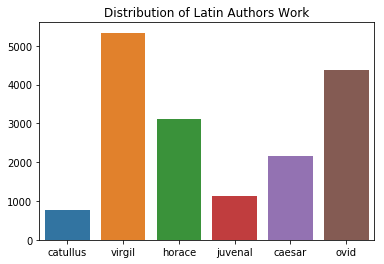

In [18]:
from matplotlib.figure import Figure
Figure(figsize=(8,8))
sns.barplot(x=list(histdic.keys()),y=list(histdic.values())).set_title('Distribution of Latin Authors Work')
plt.xlabel('Author')
plt.ylabel('Number of sentences')
plt.savefig('distributionNew.png',format='png')

In [19]:
plt.figure(figsize=(8,8))
sns.barplot(x=list(histdicWCic.keys()),y=list(histdicWCic.values())).set_title('Distribution of Latin Authors Work')
plt.xlabel('Author')
plt.ylabel('Number of sentences')
plt.savefig('distributionWCic.png',format='png')

TypeError: 'module' object is not callable

In [90]:
!pip install wordcloud

In [20]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [21]:
allwords=[]
for sentence in data:
    allwords.extend(sentence.split())

In [22]:
tocloud=[]
for w in allwords:
    if w!=':':
        if w!=';':
            if w!='-':
                if w!="'":
                    if w!=",":
                        tocloud.append(w)

In [23]:
dat=FreqDist(tocloud)

In [25]:
from matplotlib.pyplot import imshow
wc=WordCloud(width=800,height=400)
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
wc.generate_from_frequencies(dat)
# plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
# plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
# plt.show()
plt.savefig('cloud.png',format='png')

AttributeError: module 'matplotlib' has no attribute 'imshow'

In [26]:
x_train, x_test, y_train, y_test= train_test_split(data,authors,stratify=authors,random_state=42)

In [27]:
cv=CountVectorizer()
fordf=cv.fit_transform(x_train)
cols=cv.get_feature_names()
traindf=pd.DataFrame(fordf.toarray(),columns=cols)

In [28]:
# traindf['authors']=y_train
# traindf.drop(columns=['10', '100', '101', '10307', '104', '1046', '106', '107', '108','10sqq'],inplace=True)

In [29]:
drop_columns = '1100 1102 111 11444 115 118 12 120 121 122 123 125 125m 12sqq 13 1300 132 133 138 139k 14 140 143 144 147 149 14sqq 15 150 151 153 15374 155 156 159m 15sqq 16 161172 17 174m 17sqq 18 189 19 1916 193 194m 195 198 19sqq 1idem 20 200 201 201m 202 209 20m 20sqq 21 210 211 213 216 217 218 219 21920 22 220 22010 221 222 223 224 22433 225 226 227 2275 228 228m 229 22sqq 23 230 231 232 233 234 2348 234m 235 236 237 238 2386 239 23m 23sqq 24 240 24014 241 242 243 244 245 246 247 248 249 24m 24sqq 25 250 251 252 253 254 255 255k 256 257 258 2588 259 25m 26 260 261 262 262m 263 263m 264 265 266 267 268 26813 269 26918 27 270 271 272 273 274 275 276 276m 277 278 279 28 280 281 282 283 284 285 2851 28527 286 287 28722 288 289 289m 28sqq 29 290 290m 291 29116 2913 292 29296 293 29345 294 295 296 297 298 299 299m 2sq 2sqq 30 300 300m 301 301m 302 303 3035 304 305 306 307 308 308m 309 31 310 311 312 313 314 315 316 317 3174 318 318m 319 3197 320 321 322 323 323m 324 324m 325 326 327 328 329 32sq 33 330 33023 331 332 3321 333 334 335 336 337 337m 338 3387 339 340 341 342 343 343m 344 34415 34428 345 346 34617 347 3474 348 349 35 350 351 352 353 354 355 356 3568 357 358 35817 359 3597 360 361 36111 36119 362 362m 363 36328 364 364m 365 366 367 368 369 37 370 37015 371 372 373 373m 374 374k 375 376 3761 377 377sqq 378 379 3793 38 380 381 382 383 3831 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 399k 40 400 400d 401 402 403 404 40411 405 406 40616 4069 407 408 409 409m 410 411 412 413 414 415 416 417 41716 417m 418 419 4196 420 421 422 423 423m 424 424m 425 42524 426 427 428 429 42m 43 430 430msq 431 432 433 434 435 43517 436 437 438 439 4397 440 4407 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 4566 457 457k 458 459 462 47 470 472 480 482 483 484 485 486 487 49 491m 497m 498m 499 4sqq 50 500m 506 507 509 511 512m 519m 52 521m 522m 526m 533 534m 54 5425 55 550 553 555 56 562 566 58 584 586 5963 599 5artem 5et 5m 601 604 61 628 646 664 666 67 672 68 68m 69 6sq 70 70k 71 72 72m 73 757 76k 77 78 782 7sqq 80 81 82 821 824 82bib 83 85 85b 86 87 877 88 89 8sqq 90 92 9345 95 97 99 9sqq'.split()
morecolumns=['10', '100', '101', '10307', '104', '1046', '106', '107', '108','10sqq','11']
for m in morecolumns:
    drop_columns.append(m)
# testdf.drop(columns=drop_columns, inplace=True)

In [30]:
fordftest=cv.transform(x_test)
colstest=cv.get_feature_names()
testdf=pd.DataFrame(fordftest.toarray(),columns=cols)
# testdf['authors']=y_test
# testdf.drop(columns=list(testdf.columns)[:345],inplace=True)

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tff=TfidfTransformer(use_idf=False)
tft=TfidfTransformer(use_idf=True)
transtraindf=tff.fit_transform(fordf.toarray())
idfdfdat=tft.fit_transform(fordf.toarray())

In [32]:
non_idf_test = tff.transform(fordftest)
idf_test = tft.transform(fordftest)
non_idf_test_df = pd.DataFrame(non_idf_test.toarray(), columns = colstest)
idf_test_df = pd.DataFrame(idf_test.toarray(), columns=colstest)

In [33]:
len(transtraindf.toarray())

12672

In [34]:
df_train=pd.DataFrame(transtraindf.toarray(),columns=cv.get_feature_names())
# df_train.drop(columns=list(df_train.columns)[:345], inplace=True)

In [35]:
df_idf_train=pd.DataFrame(idfdfdat.toarray(),columns=cv.get_feature_names())
# df_idf_train.drop(columns=list(df_idf_train.columns)[:345],inplace=True)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

In [37]:
mnd=MultinomialNB(alpha=1)
cnb=ComplementNB(alpha=1)
dummy=DummyClassifier()

In [38]:
dummy.fit(df_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [39]:
mnd.fit(df_train,y_train)
cnb.fit(df_train,y_train)

ComplementNB(alpha=1, class_prior=None, fit_prior=True, norm=False)

In [40]:
dummy.fit(df_idf_train,y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [32]:
mnd.fit(df_idf_train,y_train)
cnb.fit(df_idf_train,y_train)

ComplementNB(alpha=1, class_prior=None, fit_prior=True, norm=False)

In [44]:
y_pred_d=dummy.predict(non_idf_test_df)

In [34]:
y_pred_d_idf=dummy.predict(idf_test_df)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(test_y, pred_y, class_names, filename, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    confusionmatrix=confusion_matrix(test_y,pred_y,labels=class_names)
    df_cm = pd.DataFrame(
        confusionmatrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(test, preds,labels):
    print(labels)
    print("Precision Score: {}".format(precision_score(test, preds,average=None,labels=labels)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None,labels=labels)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None,labels=labels)))

In [45]:
confusemtx=print_confusion_matrix(y_test,y_pred_d,list(set(y_test)),'dummy_idf_mtx.png')
print_metrics(y_test,y_pred_d,list(set(y_test)))

NameError: name 'print_confusion_matrix' is not defined

['juvenal', 'catullus', 'caesar', 'ovid', 'virgil', 'horace']
Precision Score: [0.08333333 0.03723404 0.12915129 0.2541744  0.30061824 0.20316302]
Recall Score: [0.0877193  0.03664921 0.12987013 0.25068618 0.29138577 0.21382843]
Accuracy Score: 0.2206439393939394
F1 Score: [0.08547009 0.03693931 0.12950971 0.25241824 0.29593001 0.20835933]


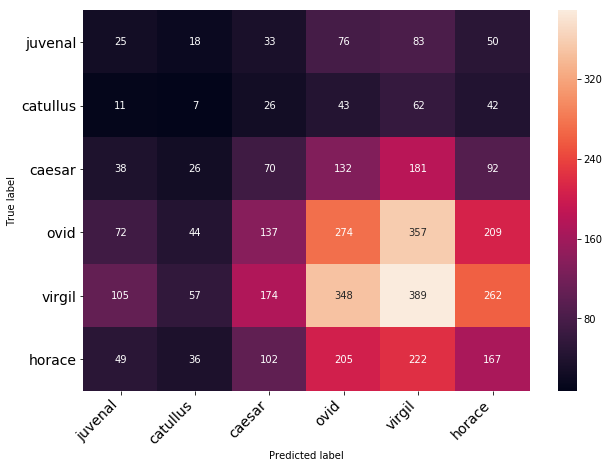

In [42]:
confusemtx=print_confusion_matrix(y_test,y_pred_d,list(set(y_test)),'anotherdummy')
print_metrics(y_test,y_pred_d,list(set(y_test)))
# with open('dummtmtx.pickle','wb') as f:
#     pickle.dump(confusemtx, f, pickle.HIGHEST_PROTOCOL)

In [65]:
y_pred_m=mnd.predict(non_idf_test_df)
y_pred_c=cnb.predict(non_idf_test_df)

In [43]:
y_pred_m_idf=mnd.predict(idf_test_df)
y_pred_c_idf=cnb.predict(idf_test_df)

In [68]:
list(set(y_test))

['catullus', 'caesar', 'ovid', 'virgil', 'horace', 'juvenal']

['juvenal', 'catullus', 'caesar', 'ovid', 'virgil', 'horace']
Precision Score: [0.62240664 0.59036145 0.79097744 0.68314425 0.66666667 0.79127726]
Recall Score: [0.52631579 0.2565445  0.97588126 0.77127173 0.83895131 0.32522407]
Accuracy Score: 0.6964962121212122
F1 Score: [0.57034221 0.35766423 0.87375415 0.72453803 0.74295191 0.46098004]


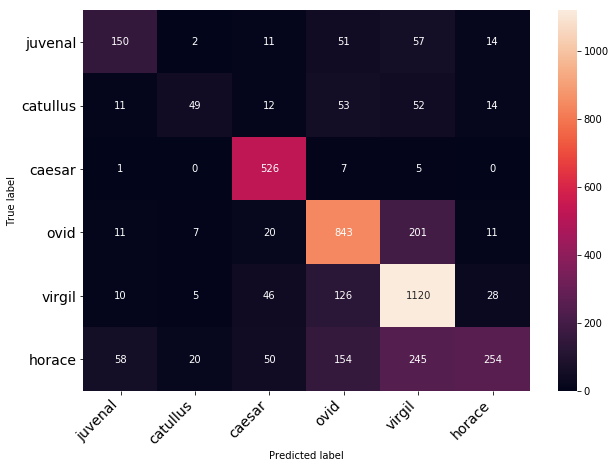

In [49]:
confusemtx=print_confusion_matrix(y_test,y_pred_c_idf,list(set(y_test)),'idf_cnlb')
print_metrics(y_test,y_pred_c_idf,list(set(y_test)))
# confusemtx=print_confusion_matrix(y_test,y_pred_m_idf,list(set(y_test)),'idf_mnlb')
# with open('goodmtx.pickle','wb') as f:
#     pickle.dump(confusemtx, f, pickle.HIGHEST_PROTOCOL)

['juvenal', 'catullus', 'caesar', 'ovid', 'virgil', 'horace']
Precision Score: [0.62240664 0.59036145 0.79097744 0.68314425 0.66666667 0.79127726]
Recall Score: [0.52631579 0.2565445  0.97588126 0.77127173 0.83895131 0.32522407]
Accuracy Score: 0.6964962121212122
F1 Score: [0.57034221 0.35766423 0.87375415 0.72453803 0.74295191 0.46098004]


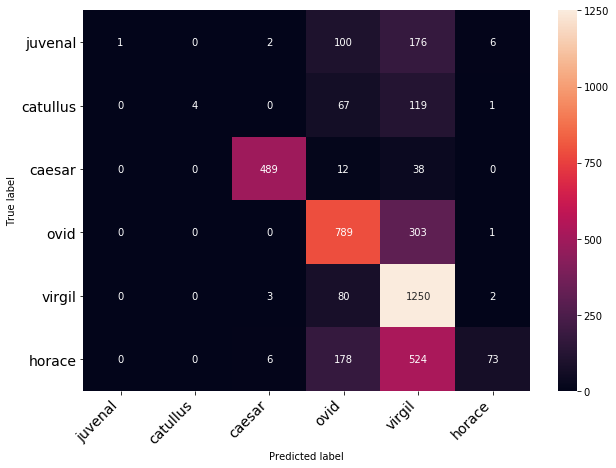

In [50]:
confusemtx=print_confusion_matrix(y_test,y_pred_m_idf,list(set(y_test)),'idf_mnlb')
print_metrics(y_test,y_pred_c_idf,list(set(y_test)))

In [71]:
print('catullus: ',len(catullus_labels))
print('virgil: ',len(virgil_labels))
print('ovid: ',len(ovid_labels))
# print('cicero: ',len(cicero_labels))
print('caesar: ',len(caesar_labels))
print('horace: ',len(horace_labels))
print('juvenal: ',len(juvenal_labels))
print('\n just in test set: \n',pd.Series(y_test).value_counts())

catullus:  765
virgil:  5339
ovid:  4373
caesar:  2156
horace:  3122
juvenal:  1141

 just in test set: 
 virgil      1335
ovid        1093
horace       781
caesar       539
juvenal      285
catullus     191
dtype: int64


In [72]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(test, preds,labels):
    print(labels)
    print("Precision Score: {}".format(precision_score(test, preds,average=None,labels=labels)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None,labels=labels)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None,labels=labels)))

In [73]:
print_metrics(y_test,y_pred_c_idf,list(set(y_test)))
#Caesar has the most proper nouns probably, most distinctive

['catullus', 'caesar', 'ovid', 'virgil', 'horace', 'juvenal']
Precision Score: [0.59036145 0.79097744 0.68314425 0.66666667 0.79127726 0.62240664]
Recall Score: [0.2565445  0.97588126 0.77127173 0.83895131 0.32522407 0.52631579]
Accuracy Score: 0.6964962121212122
F1 Score: [0.35766423 0.87375415 0.72453803 0.74295191 0.46098004 0.57034221]
